# E05 - 당뇨병 수치 예측

In [32]:
# 데이터 준비하기

from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Iteration 10 : Loss 20938.6270
Iteration 20 : Loss 15545.8406
Iteration 30 : Loss 11905.3004
Iteration 40 : Loss 9437.3045
Iteration 50 : Loss 7754.8241
Iteration 60 : Loss 6599.3917
Iteration 70 : Loss 5798.3258
Iteration 80 : Loss 5236.1921
Iteration 90 : Loss 4835.7627
Iteration 100 : Loss 4545.3137
Iteration 110 : Loss 4330.1506
Iteration 120 : Loss 4166.9534
Iteration 130 : Loss 4040.0052
Iteration 140 : Loss 3938.6741
Iteration 150 : Loss 3855.7336
Iteration 160 : Loss 3786.2411
Iteration 170 : Loss 3726.7889
Iteration 180 : Loss 3675.0036
Iteration 190 : Loss 3629.2117
Iteration 200 : Loss 3588.2155
Iteration 210 : Loss 3551.1423
Iteration 220 : Loss 3517.3443
Iteration 230 : Loss 3486.3299
Iteration 240 : Loss 3457.7179
Iteration 250 : Loss 3431.2061
Iteration 260 : Loss 3406.5500
Iteration 270 : Loss 3383.5479
Iteration 280 : Loss 3362.0303
Iteration 290 : Loss 3341.8534
Iteration 300 : Loss 3322.8927
Iteration 310 : Loss 3305.0403
Iteration 320 : Loss 3288.2013
Iteration 330 

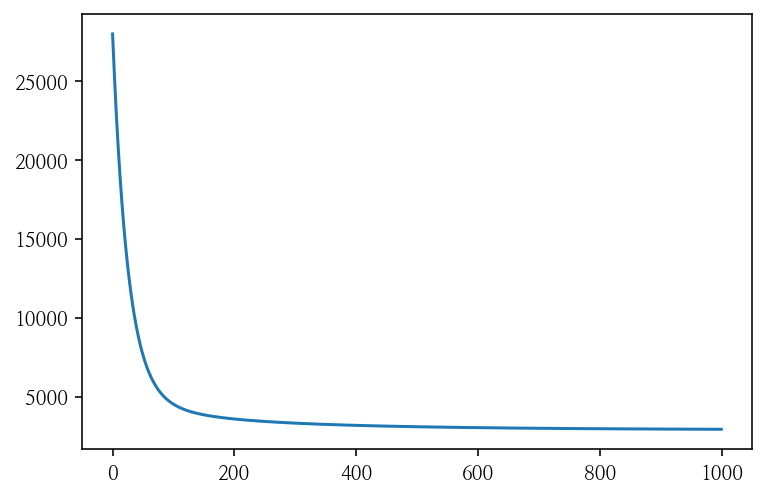

In [40]:
# 데이터를 각 변수에 할당하기
df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
df_y = df['target'].values

# 데이터를 numpy array로 변환하기
import numpy as np
df_X = np.array(df_X)
df_y = np.array(df_y)

# 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# W, b
W = np.random.rand(10)
b = np.random.rand()

# 모델 준비
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 손실함수 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# gradient함수 구현
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# 학습률 설정
LEARNING_RATE = 0.01

# 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

2867.073100757539


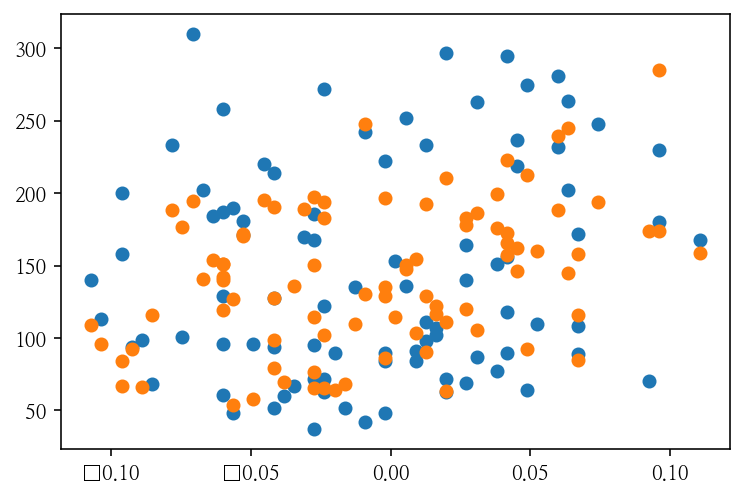

In [43]:
# 테스터 데이터로 예측해보기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

plt.scatter(X_test[:, 0], y_test)     # 실제값
plt.scatter(X_test[:, 0], prediction) # 예측값
plt.show()


# E05 - 자전거 대여량 예측

In [102]:
# 데이터 준비하기

import os
import datetime

csv_path = os.getenv("HOME") + "/aiffel/train.csv"
train = pd.read_csv(csv_path)
date_df = pd.to_datetime(train['datetime'])
train['Year'] = date_df.dt.year
train['month'] = date_df.dt.month
train['day'] = date_df.dt.day
train['hour'] = date_df.dt.hour
train['minute'] = date_df.dt.minute
train['second'] = date_df.dt.second

train = train[['Year', 'month', 'day', 'hour', 'minute', 'second',
              'season', 'holiday', 'workingday', 'weather', 'temp',
              'atemp', 'humidity', 'windspeed', 'casual', 'registered',
              'count']]
train.head()

,Year,month,day,hour,minute,second,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,0,0,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,1,0,0,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,1,2,0,0,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,1,3,0,0,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,1,4,0,0,1,0,0,1,9.84,14.395,75,0.0,0,1,1


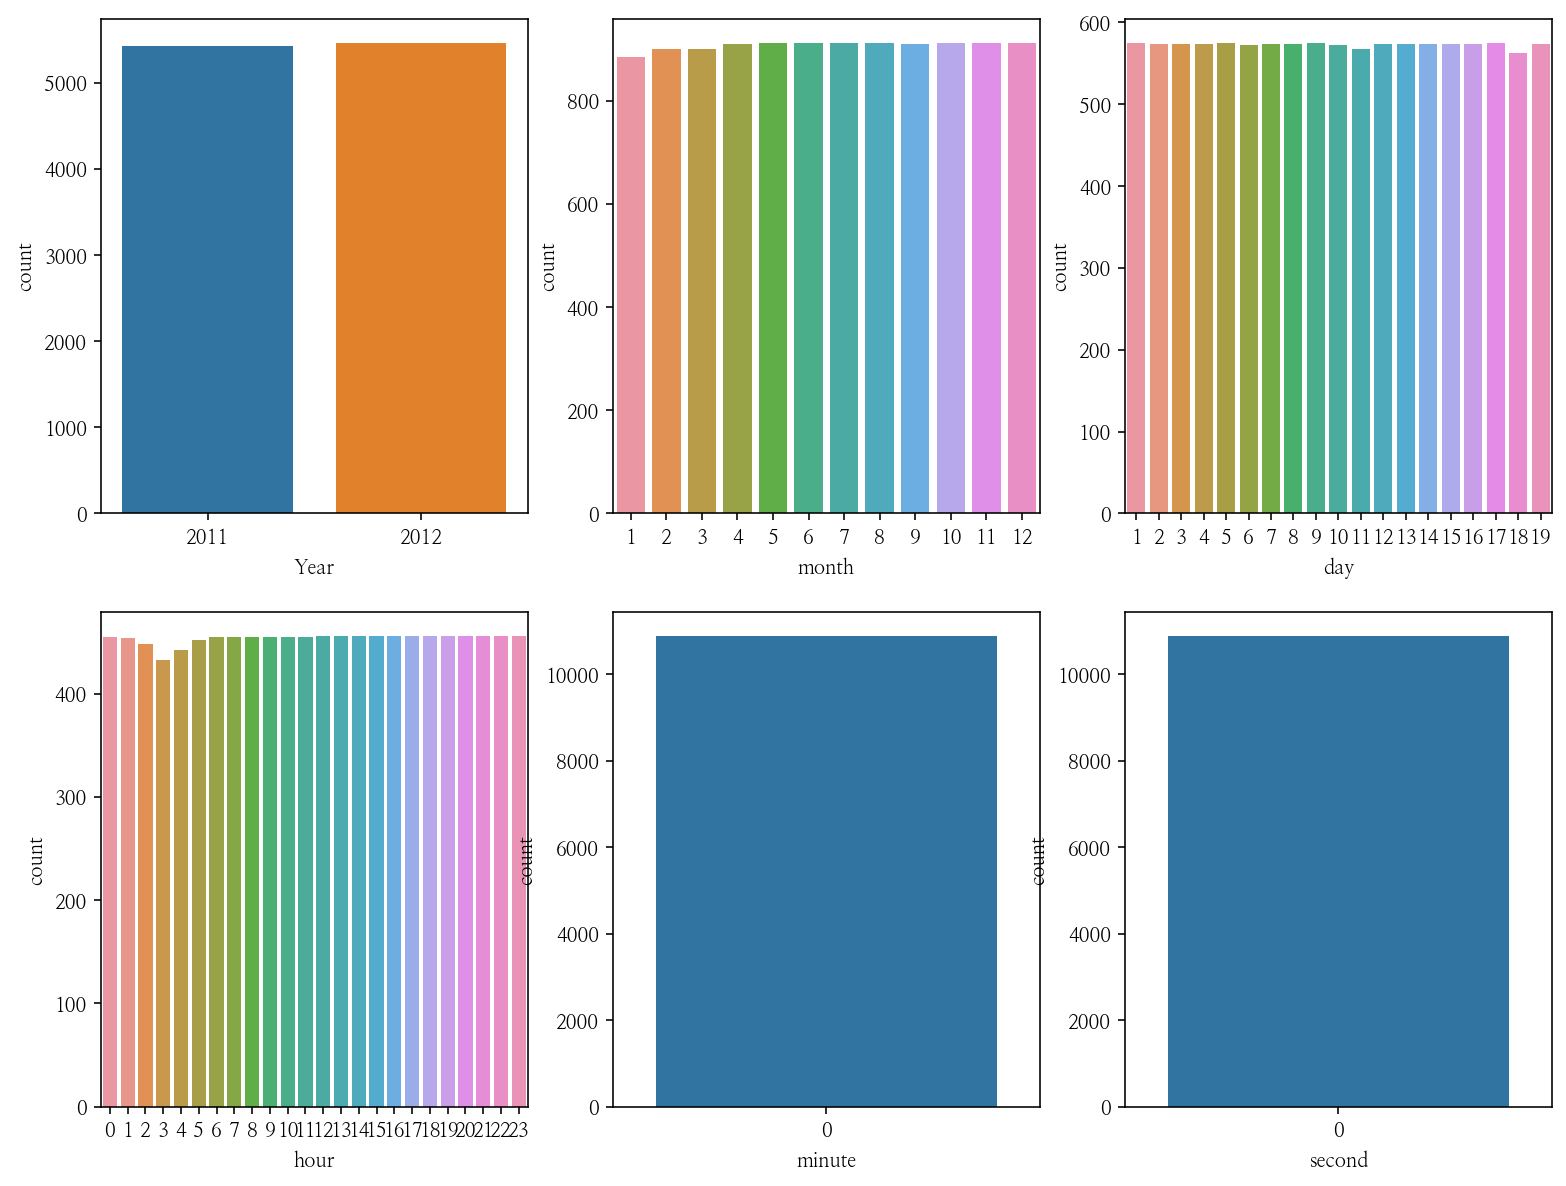

In [84]:
import seaborn as sns

fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot(2, 3, 1)
sns.countplot(x='Year', data=train)
ax2 = fig.add_subplot(2, 3, 2)
sns.countplot(x='month', data=train)
ax3 = fig.add_subplot(2, 3, 3)
sns.countplot(x='day', data=train)
ax4 = fig.add_subplot(2, 3, 4)
sns.countplot(x='hour', data=train)
ax5 = fig.add_subplot(2, 3, 5)
sns.countplot(x='minute', data=train)
ax6 = fig.add_subplot(2, 3, 6)
sns.countplot(x='second', data=train)

plt.show()

In [95]:
# X, y 준비
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
          'atemp', 'humidity', 'windspeed', 'registered']].values
y = train['count'].values

# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형회귀 모델 가져오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 훈련시키기
model.fit(X_train, y_train)

# 테스트 데이터로 예측해보기
predictions = model.predict(X_test)
print(predictions, end='\n\n')

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print('mse = {}\nrmse = {}'.format(mse, mse ** 0.5))

[146.89525564  16.09850345 197.90189482 ... 454.17259307  18.12067327
 244.88746797]

mse = 1167.209637762975
rmse = 34.16444991161097


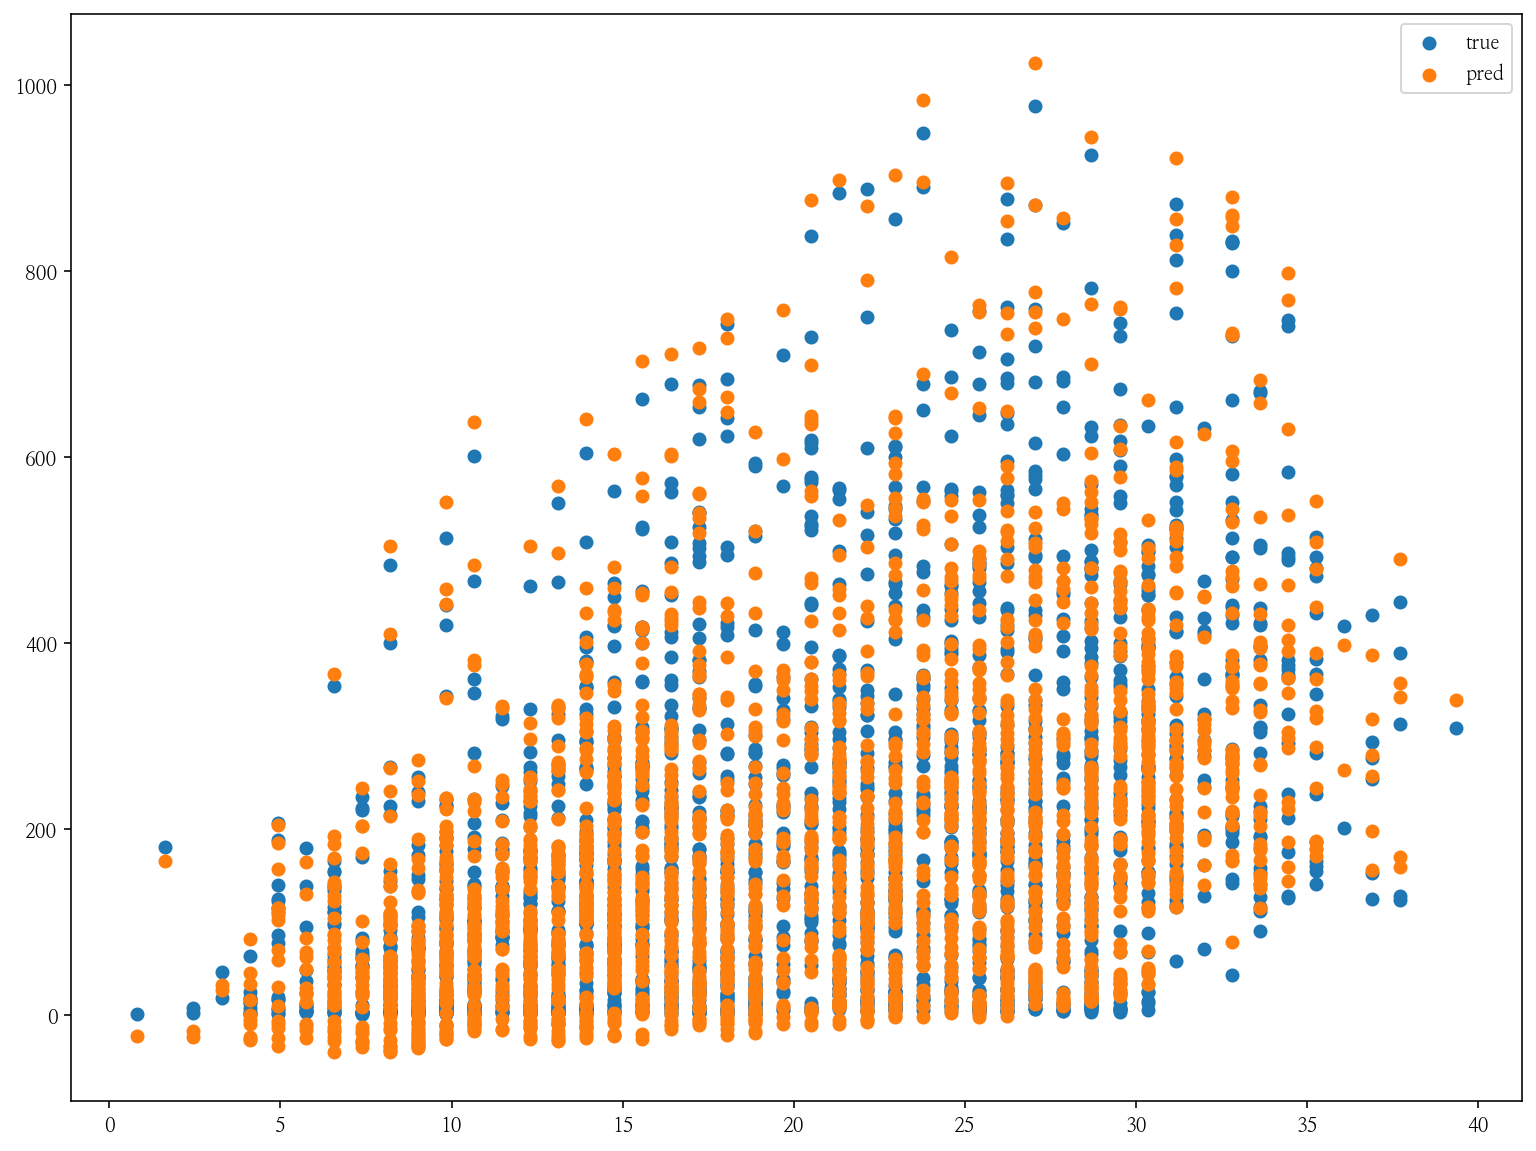

In [100]:
# 시각화하기

fig2 = plt.figure(figsize=(13,10))
# plt.scatter(X_test[:, 4], y_test, label="true")
# plt.scatter(X_test[:, 4], predictions, label="pred")
# plt.legend()

sns.barplot()

plt.show()